<a href="https://colab.research.google.com/github/jhmartel/fp/blob/master/_notebooks/2022-04-20-MillionaireGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yang's Millionaire's Problem. Part 1. 

> " We begin the study of Yang's Millionaire Problem, approaching via a convex analysis interpretation: two players $A,B$ have secret points $s_A, s_B \in \mathbf{R}^2$, and the first player to guess an affine function which separates the secrets wins!  "

- toc: false
- branch: master
- badges: false
- comments: true
- categories: [millionaire, secret, convex analysis]
- hide: false


The purpose of this article is to investigate whether there is an strategy or skill possible in the following variation of the "Millionaire Problem". [reference].

Here is the game. We have a huge grid $\mathbf{R}^2$. Now let two players $A,B$ have secret locations $s_A=(x_A, y_A)$ and $s_B=(x_B, y_B)$. These secrets are _points_ in the euclidean plane $\mathbf{R}^2$. 

Now the players $A, B$ are going to take turns guessing affine functions (or affine lines in $\mathbf{R}^2$) and the first player to guess an affine function which separates the secrets wins! 

The gameplay is something like this: The players $A,B$ take turns. If player $A$ goes first, then player $A$ chooses an affine function $\ell$ on $\mathbf{R}^2$, and asks player $B$ to reply with the sign of $\ell(s_B)$. We require that $B$ replies honestly with $sgn(\ell(s_B))$. This is the end of player $A$'s turn. If $\ell$ separates the secrets, then player A wins. Otherwise it's player B's turn. Next player $B$ chooses an affine function $\ell'$, and asks player $A$ to reply with the sign of $\ell'(s_A)$. Once player $A$ replies, then this is the end of player $B$'s turn. Again, if $\ell'$ separates the secrets, then player B wins. Otherwise it's player A's turn.

The object of the game is to determine an affine function $\ell$ which separates the secrets, i.e. for which $ sgn(\ell(s_A)) \neq sgn(\ell(s_B)).$ The first player to demonstrate an affine function which separates the secrets wins!

Our interest is to find optimal strategies for this game. In the millionaire game, the players A,B have an interest in _privacy_. Their secrets $s_A, s_B$ are intended to be _secret_. This means the players A,B might not choose affine functions which potentially reveal information about their own secrets. In practice this means players determined to maintain their privacy will always choose affine functions which do not bound compact convex sets. Similarly, an opponent will not readily choose affine functions which separates the domain into a bounded component, since the probability that the opponent's secret lies in the bounded component is relatively small, while the probability of its lying in the unbounded component is much greater. 




The subject of so-called _zero knowledge proofs_ in cryptography is related to the millionaires problem. Here we try to find a balance where the players can choose to reveal as much as they wish of their own balances, while their own guesses are signals/indications in-themselves of the secret balance.

Our question is whether there is any strategy or skill in this game. What is the optimal strategy? Can the player use the knowledge of the opponent's affine functions to improve their own selection of affine function??

In [117]:
import numpy as np

#s_A=input("What is player A's secret position?")
s_A=[1,0]
s_A=np.array(s_A)

#s_B=input("What is player B's secret position?")
s_B=[0, 2]
s_B=np.array(s_B)


def affine(n,x,b):
    n=np.array(n)
    x=np.array(x)
   # return n.dot(x)+b
    return n[0]*x[0]+n[1]*x[1] + b

def sign(x_Real):
    if x_Real<0: 
        return -1
    else:
        return +1

def t(n,b):
    n=np.array(n)
    if sign(affine(n,s_A,b)) != sign(affine(n,s_B, b)):
         return True
    else:
         return False


1


In [ ]:
outcome=False
history=[]
vector_history=[]
player=+1
i=0
color=[]


while outcome == False:
    print("\n Player " + str(player) + "'s turn to play:" )
    print("Given the history " + str(history) + " choose your affine function:")     
    
    n0 = float(input())
    n1 = float(input())
    b = float(input())
    history = history + [[n0, n1, b]]
    vector_history = vector_history+[[n0,n1]] 
    i=i+1


    if t([n0, n1], b) == True:
        outcome = True
        print("Winner! Player " + str(player)+ " has separated the secrets with " + str([n0, n1, b]) + ".")
    else:
        print("Fail! Player " + str(player) + " has not separated the secrets.")
        player=player*(-1)

    

    V=np.array(vector_history)
    origin=np.array([[0]*i, [0]*i])
    plt.quiver(*origin, V[:,0], V[:,1], scale=21)
    plt.show()          



 Player 1's turn to play:
Given the history [] choose your affine function:


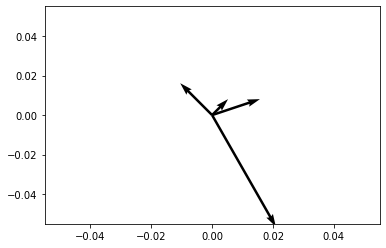

In [114]:
import matplotlib.pyplot as plt

V=np.array([[1,1], [-2,2], [4,-7], [3,1]])
origin=np.array([[0,0,0,0], [0,0,0,0]])
plt.quiver(*origin, V[:,0], V[:,1], scale=21)
plt.show()